<a href="https://colab.research.google.com/github/kanikaKanu90/amazon-sagemaker-examples/blob/master/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import sys
 # ctrl+/ for comments 
 # sys' module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter.

print(tf.__version__, sys.version)

2.3.0 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)


17465344/17464789 [==============================] - 1s 0us/step


In [4]:
max([max(sequence) for sequence in train_data]) #9999

train_data.shape, train_data.ndim, type(train_data[0])  #print datatype


((25000,), 1, list)

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  print('length:', len(sequences))
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
   # print("place: ", i)
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(type(x_train[0][1]))


length: 25000
length: 25000
<class 'numpy.float64'>


In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])

1.0


In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train,epochs=20,batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5215 - accuracy: 0.7842 - val_loss: 0.4012 - val_accuracy: 0.8644
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.3069 - accuracy: 0.9025 - val_loss: 0.3048 - val_accuracy: 0.8891
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2233 - accuracy: 0.9254 - val_loss: 0.2835 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1733 - accuracy: 0.9436 - val_loss: 0.2911 - val_accuracy: 0.8817
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1404 - accuracy: 0.9555 - val_loss: 0.2837 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1168 - accuracy: 0.9633 - val_loss: 0.3127 - val_accuracy: 0.8798
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0917 - accuracy: 0.9739 - val_loss: 0.3199 - val_accuracy: 0.8836
Epoch 8/20
30

In [8]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

ValueError: ignored

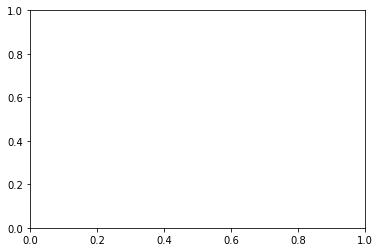

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(20, loss_values, 'bo', label='Training loss')
plt.plot(20, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()
